<a href="https://colab.research.google.com/github/benasphy/DBSCAN/blob/main/DBSCAN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

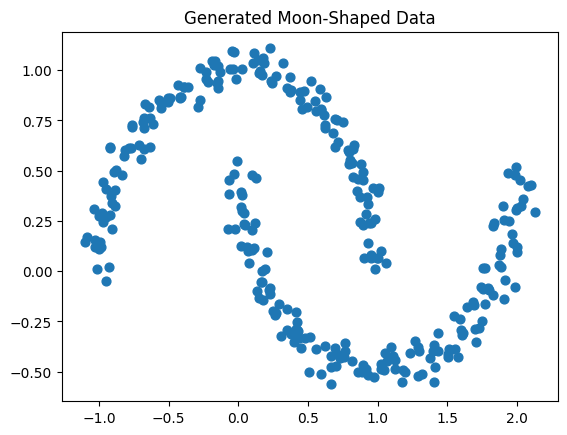

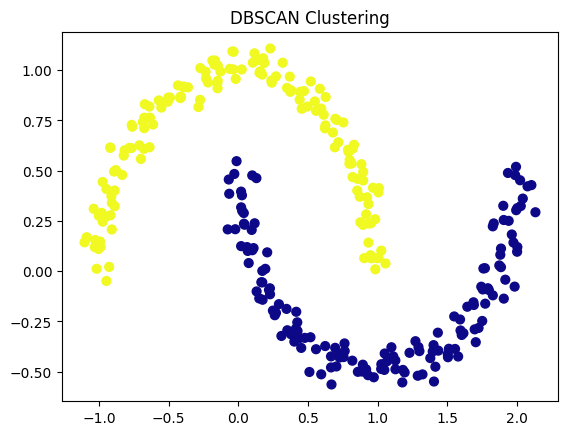

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


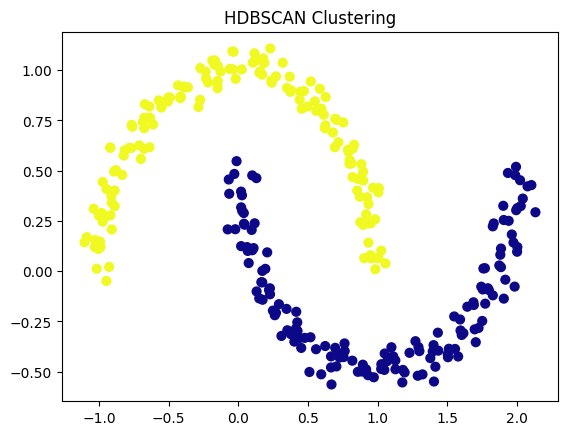

📊 Clustering Evaluation
DBSCAN:  Clusters=2, Noise=0, Silhouette=0.3308
HDBSCAN: Clusters=2, Noise=0, Silhouette=0.3308


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Optional: install HDBSCAN
# !pip install hdbscan
import hdbscan

# Step 1: Generate Data (make_moons)

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title("Generated Moon-Shaped Data")
plt.show()


# Step 2: Apply DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
db_labels = dbscan.fit_predict(X)

# Visualize DBSCAN Clusters
plt.scatter(X[:, 0], X[:, 1], c=db_labels, cmap='plasma', s=40)
plt.title("DBSCAN Clustering")
plt.show()


# Step 3: Apply HDBSCAN

hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb_labels = hdb.fit_predict(X)

# Visualize HDBSCAN Clusters
plt.scatter(X[:, 0], X[:, 1], c=hdb_labels, cmap='plasma', s=40)
plt.title("HDBSCAN Clustering")
plt.show()

# Step 4: Compare Clustering Quality

def evaluate_clustering(X, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    silhouette = silhouette_score(X, labels) if n_clusters > 1 else -1
    return n_clusters, n_noise, silhouette

db_results = evaluate_clustering(X, db_labels)
hdb_results = evaluate_clustering(X, hdb_labels)

print("📊 Clustering Evaluation")
print(f"DBSCAN:  Clusters={db_results[0]}, Noise={db_results[1]}, Silhouette={db_results[2]:.4f}")
print(f"HDBSCAN: Clusters={hdb_results[0]}, Noise={hdb_results[1]}, Silhouette={hdb_results[2]:.4f}")
